Mean Squared Error (MSE): 2417.278521808397
Root Mean Squared Error (RMSE): 49.16582676827876
R-squared (R2): 0.7541549503440196
Mean Absolute Error (MAE): 33.53817339149011


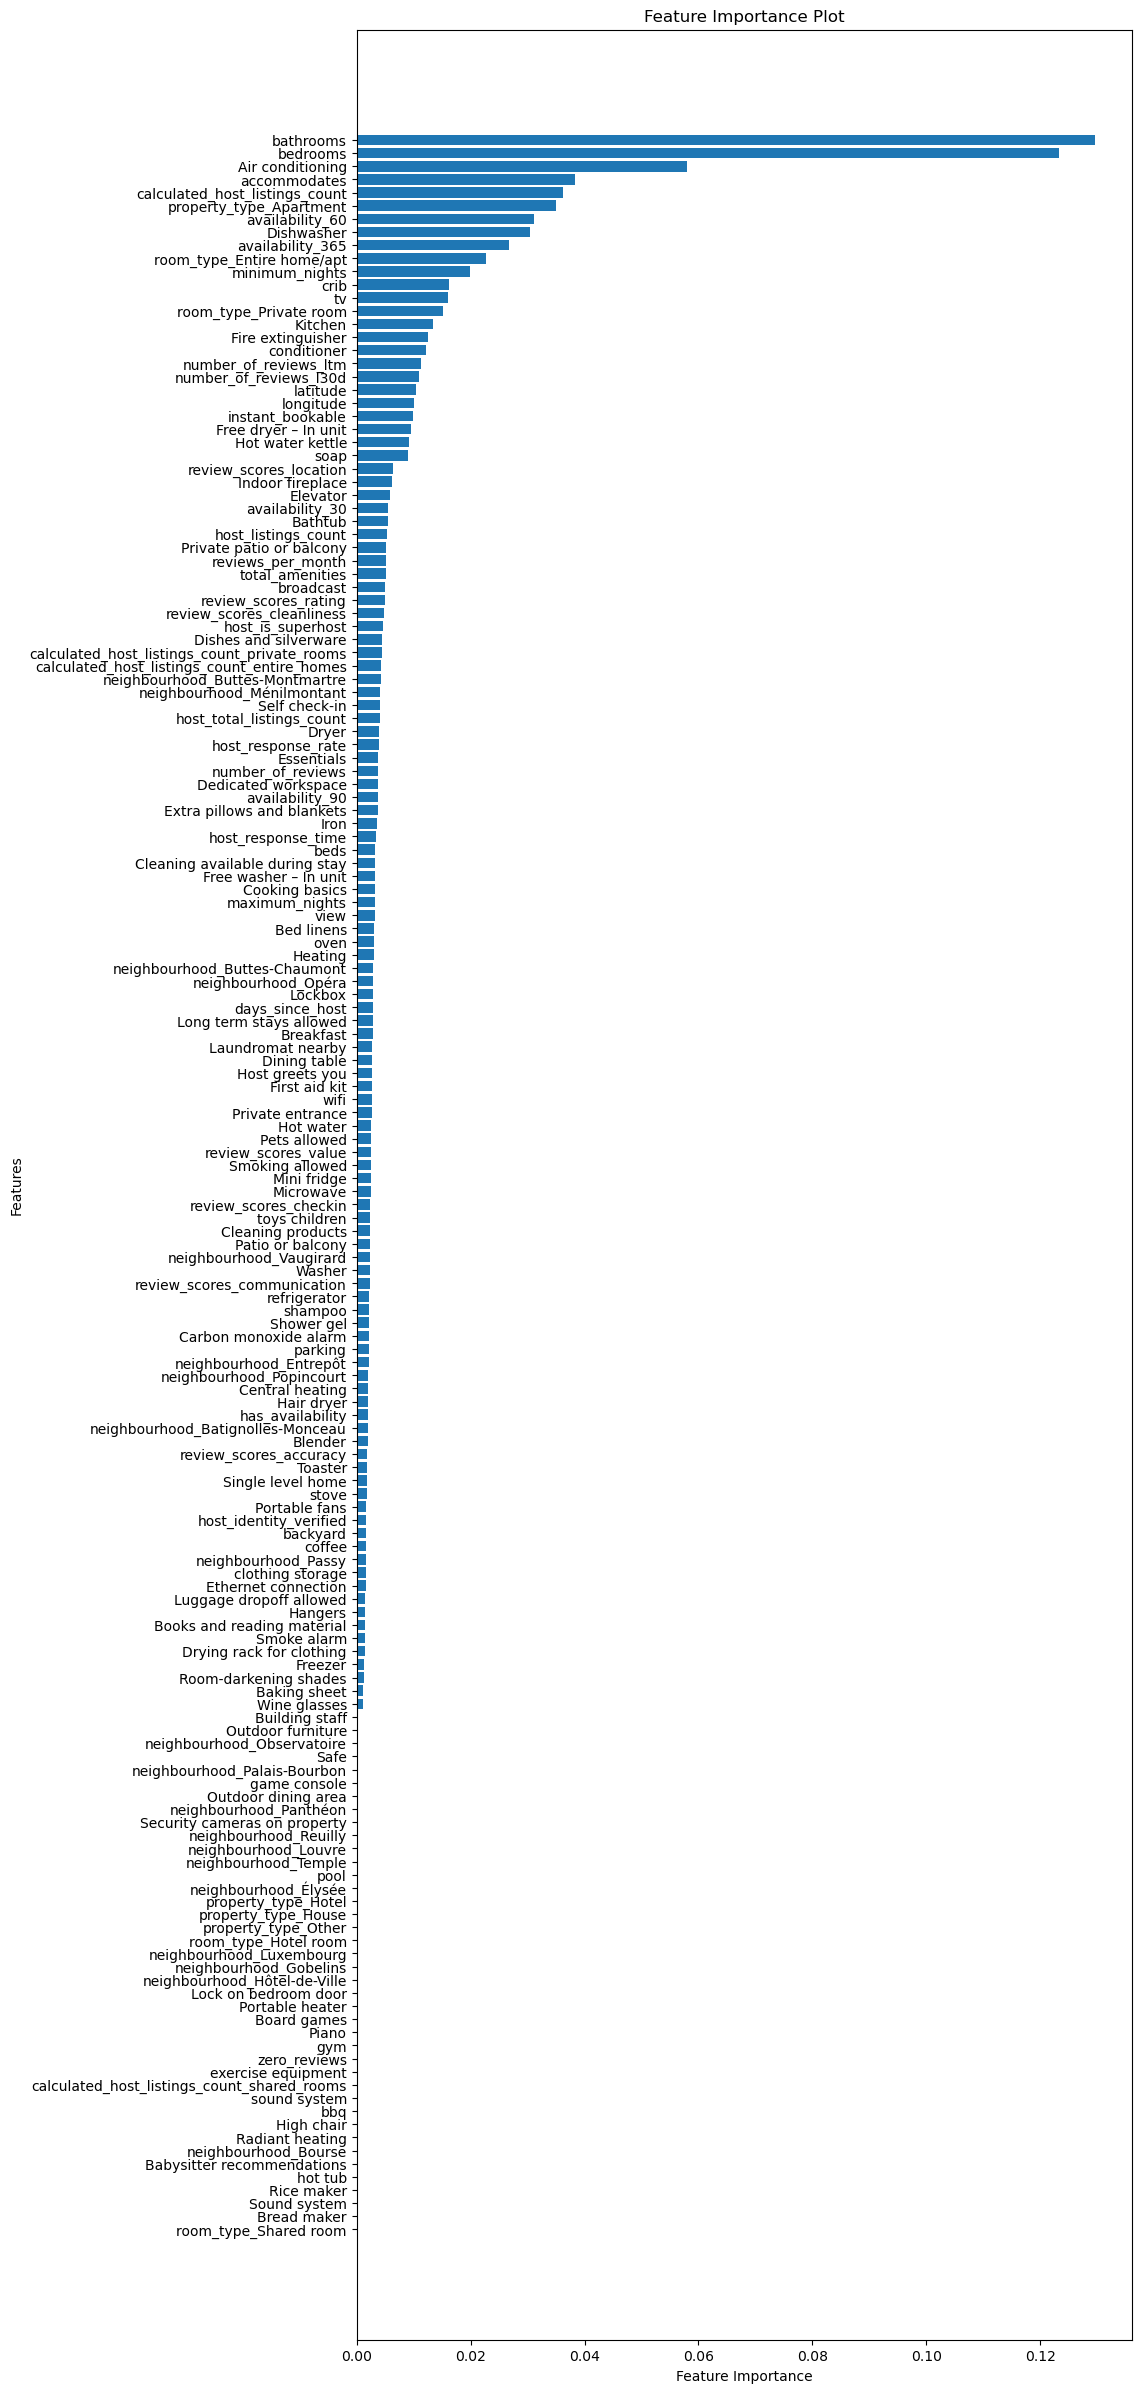

In [26]:
!pip install pandas scikit-learn xgboost matplotlib


import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

columns_to_drop = []
xgbdata = data_copy_clean.drop(columns_to_drop, axis=1)


# Split the data into features (X) and target variable (y)
X = xgbdata.drop('price', axis=1)
y = xgbdata['price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate XGBoost Regressor
model = xgb.XGBRegressor()

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print performance metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)

# Feature Importances
feature_importance = model.feature_importances_
sorted_idx = feature_importance.argsort()

# Plot feature importances
plt.figure(figsize=(10, 30))
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot")
plt.show()

In [23]:
# Backward feature selection
selected_features = list(X.columns)
removed_features = list()
for feature in X.columns:
    # Temporarily remove the feature
    remaining_features = selected_features.copy()
    remaining_features.remove(feature)
    
    # Train model without the removed feature
    model = xgb.XGBRegressor()
    model.fit(X_train[remaining_features], y_train)
    
    # Evaluate performance
    y_pred = model.predict(X_test[remaining_features])
    backwardrmse = mean_squared_error(y_test, y_pred, squared=False)
    
    # If performance improves, update selected features
    if backwardrmse < (rmse+0.01):
        selected_features = remaining_features
        rmse = backwardrmse
        print(f"Feature '{feature}' removed. RMSE: {rmse}")
        removed_features.append(feature)
    else:
        print(f"Feature '{feature}' kept. RMSE: {rmse}")

print("\nFinal selected features:", selected_features)
print("removed features:", removed_features)

Feature 'host_response_time' removed. RMSE: 49.04633865989258
Feature 'host_response_rate' kept. RMSE: 49.04633865989258
Feature 'host_is_superhost' kept. RMSE: 49.04633865989258
Feature 'host_listings_count' removed. RMSE: 49.01148302170097
Feature 'host_total_listings_count' kept. RMSE: 49.01148302170097
Feature 'host_identity_verified' kept. RMSE: 49.01148302170097
Feature 'latitude' kept. RMSE: 49.01148302170097
Feature 'longitude' kept. RMSE: 49.01148302170097
Feature 'accommodates' kept. RMSE: 49.01148302170097
Feature 'bathrooms' kept. RMSE: 49.01148302170097
Feature 'bedrooms' kept. RMSE: 49.01148302170097
Feature 'beds' kept. RMSE: 49.01148302170097
Feature 'minimum_nights' kept. RMSE: 49.01148302170097
Feature 'maximum_nights' kept. RMSE: 49.01148302170097
Feature 'has_availability' kept. RMSE: 49.01148302170097
Feature 'availability_30' kept. RMSE: 49.01148302170097
Feature 'availability_60' kept. RMSE: 49.01148302170097
Feature 'availability_90' kept. RMSE: 49.0114830217009

Feature 'neighbourhood_Opéra' kept. RMSE: 48.758053370254935
Feature 'neighbourhood_Palais-Bourbon' removed. RMSE: 48.758053370254935
Feature 'neighbourhood_Panthéon' removed. RMSE: 48.758053370254935
Feature 'neighbourhood_Passy' kept. RMSE: 48.758053370254935
Feature 'neighbourhood_Popincourt' kept. RMSE: 48.758053370254935
Feature 'neighbourhood_Reuilly' removed. RMSE: 48.758053370254935
Feature 'neighbourhood_Temple' removed. RMSE: 48.758053370254935
Feature 'neighbourhood_Vaugirard' kept. RMSE: 48.758053370254935
Feature 'neighbourhood_Élysée' removed. RMSE: 48.758053370254935
Feature 'property_type_Apartment' kept. RMSE: 48.758053370254935
Feature 'property_type_Hotel' removed. RMSE: 48.758053370254935
Feature 'property_type_House' removed. RMSE: 48.758053370254935
Feature 'property_type_Other' removed. RMSE: 48.758053370254935
Feature 'room_type_Entire home/apt' kept. RMSE: 48.758053370254935
Feature 'room_type_Hotel room' removed. RMSE: 48.758053370254935
Feature 'room_type_Pri


Performance metrics with filtered features:
Mean Squared Error (MSE): 2377.3477684566283
Root Mean Squared Error (RMSE): 48.758053370254935
R-squared (R2): 0.7582160372034776
Mean Absolute Error (MAE): 33.13366143532964


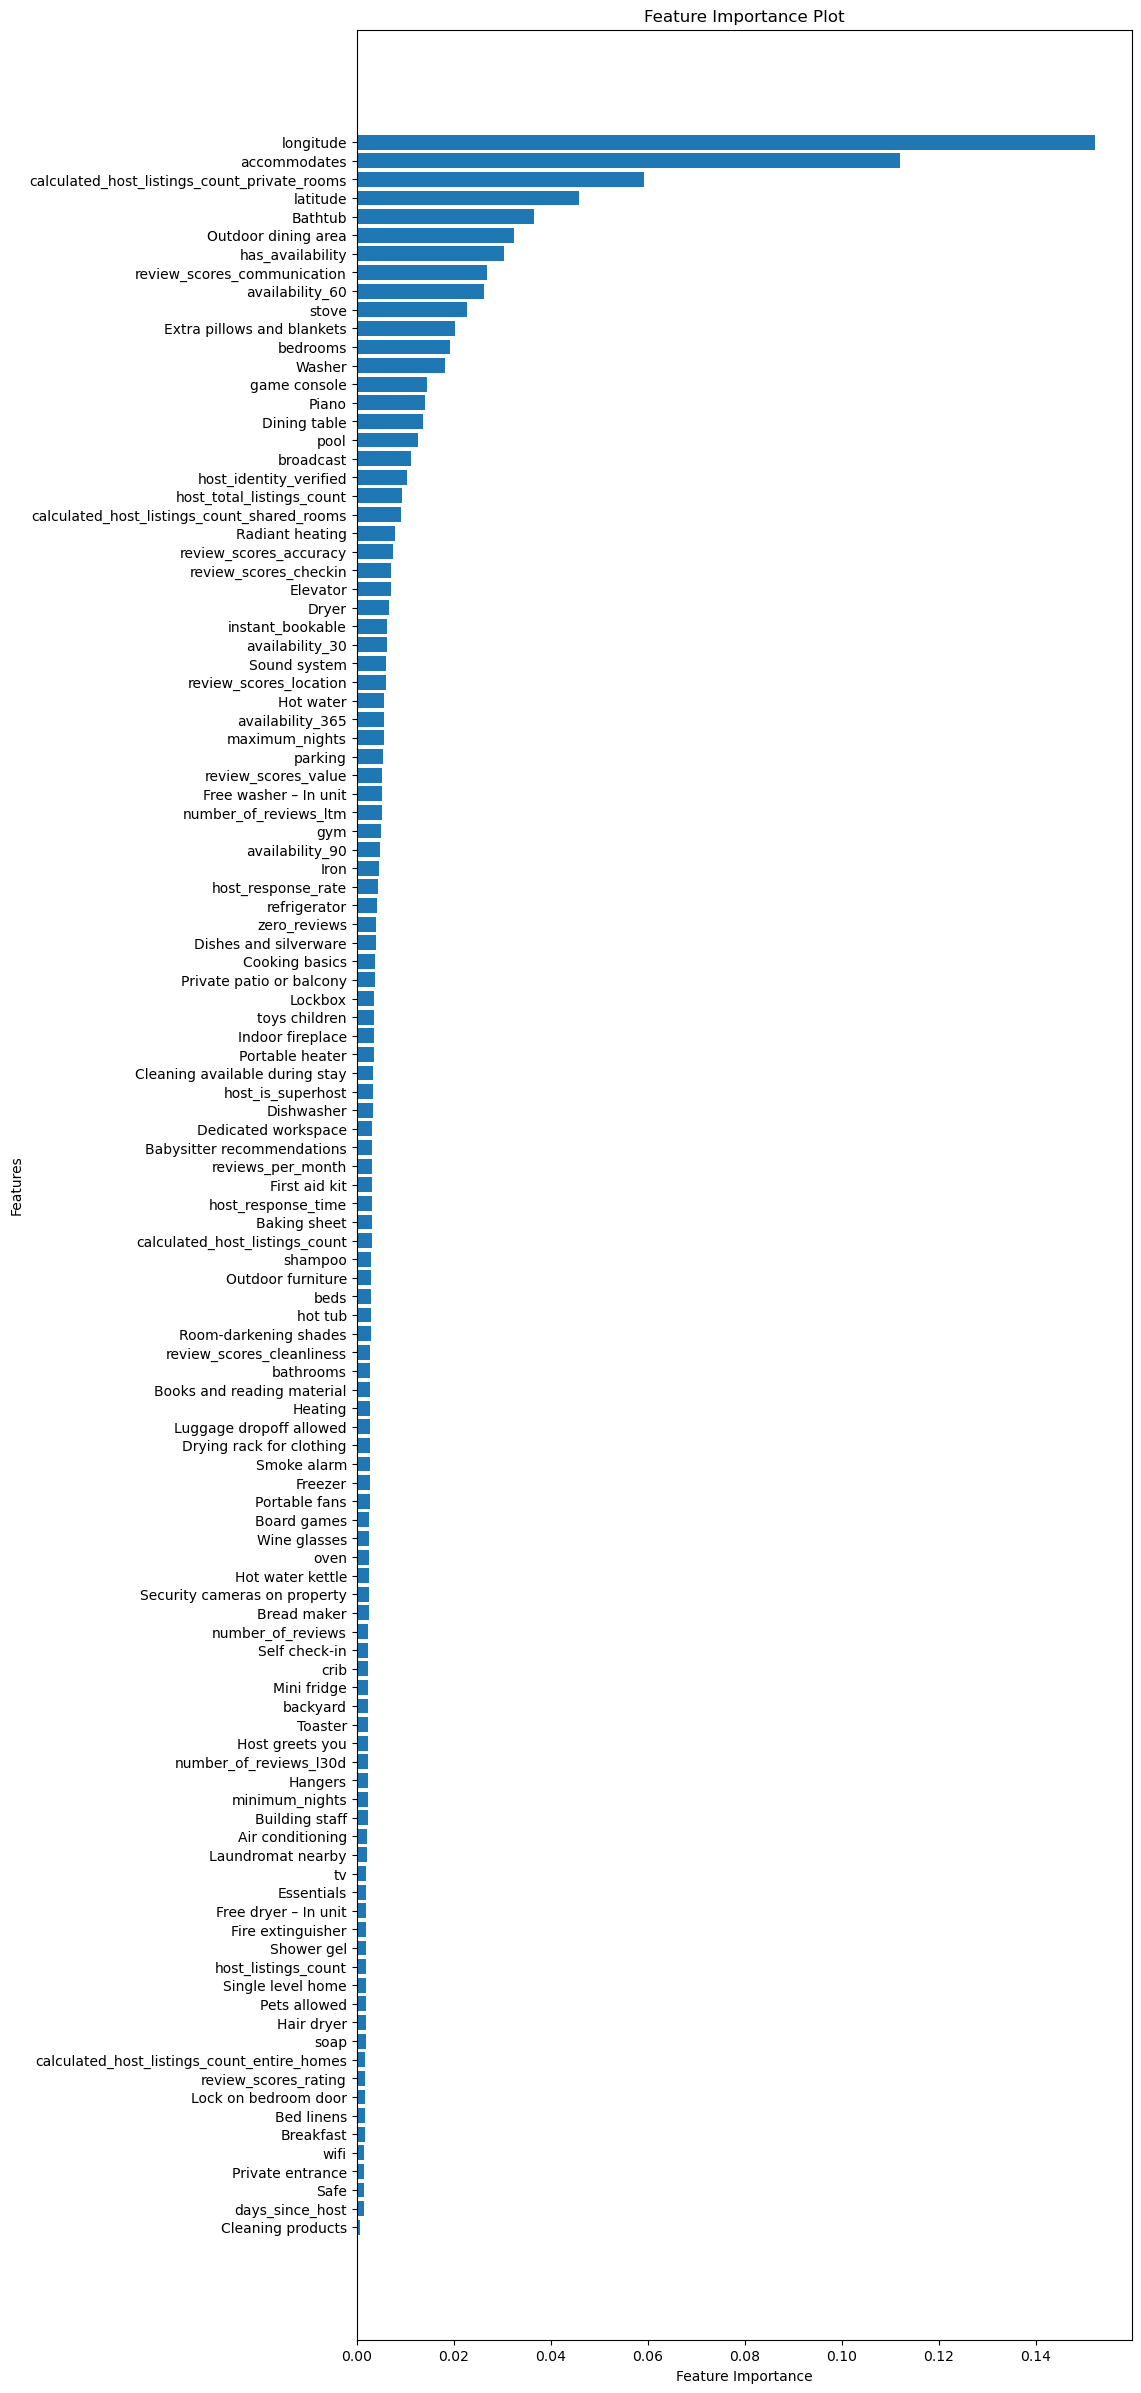

In [24]:
X_train_filtered = X_train[selected_features]
X_test_filtered = X_test[selected_features]

# Train a new XGBoost model with filtered features
model_filtered = xgb.XGBRegressor()
model_filtered.fit(X_train_filtered, y_train)

# Predict on the test set with filtered features
y_pred_filtered = model_filtered.predict(X_test_filtered)

# Calculate performance metrics with filtered features
mse_filtered = mean_squared_error(y_test, y_pred_filtered)
rmse_filtered = mean_squared_error(y_test, y_pred_filtered, squared=False)
r2_filtered = r2_score(y_test, y_pred_filtered)
mae_filtered = mean_absolute_error(y_test, y_pred_filtered)

# Print performance metrics with filtered features
print("\nPerformance metrics with filtered features:")
print("Mean Squared Error (MSE):", mse_filtered)
print("Root Mean Squared Error (RMSE):", rmse_filtered)
print("R-squared (R2):", r2_filtered)
print("Mean Absolute Error (MAE):", mae_filtered)

# Feature Importances
feature_importance = model.feature_importances_
sorted_idx = feature_importance.argsort()

# Plot feature importances
plt.figure(figsize=(10, 30))
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot")
plt.show()



Performance metrics with filtered features:
Mean Squared Error (MSE): 2716.6375621088605
Root Mean Squared Error (RMSE): 52.12137337128465
R-squared (R2): 0.7237091670122022
Mean Absolute Error (MAE): 35.33105059255634


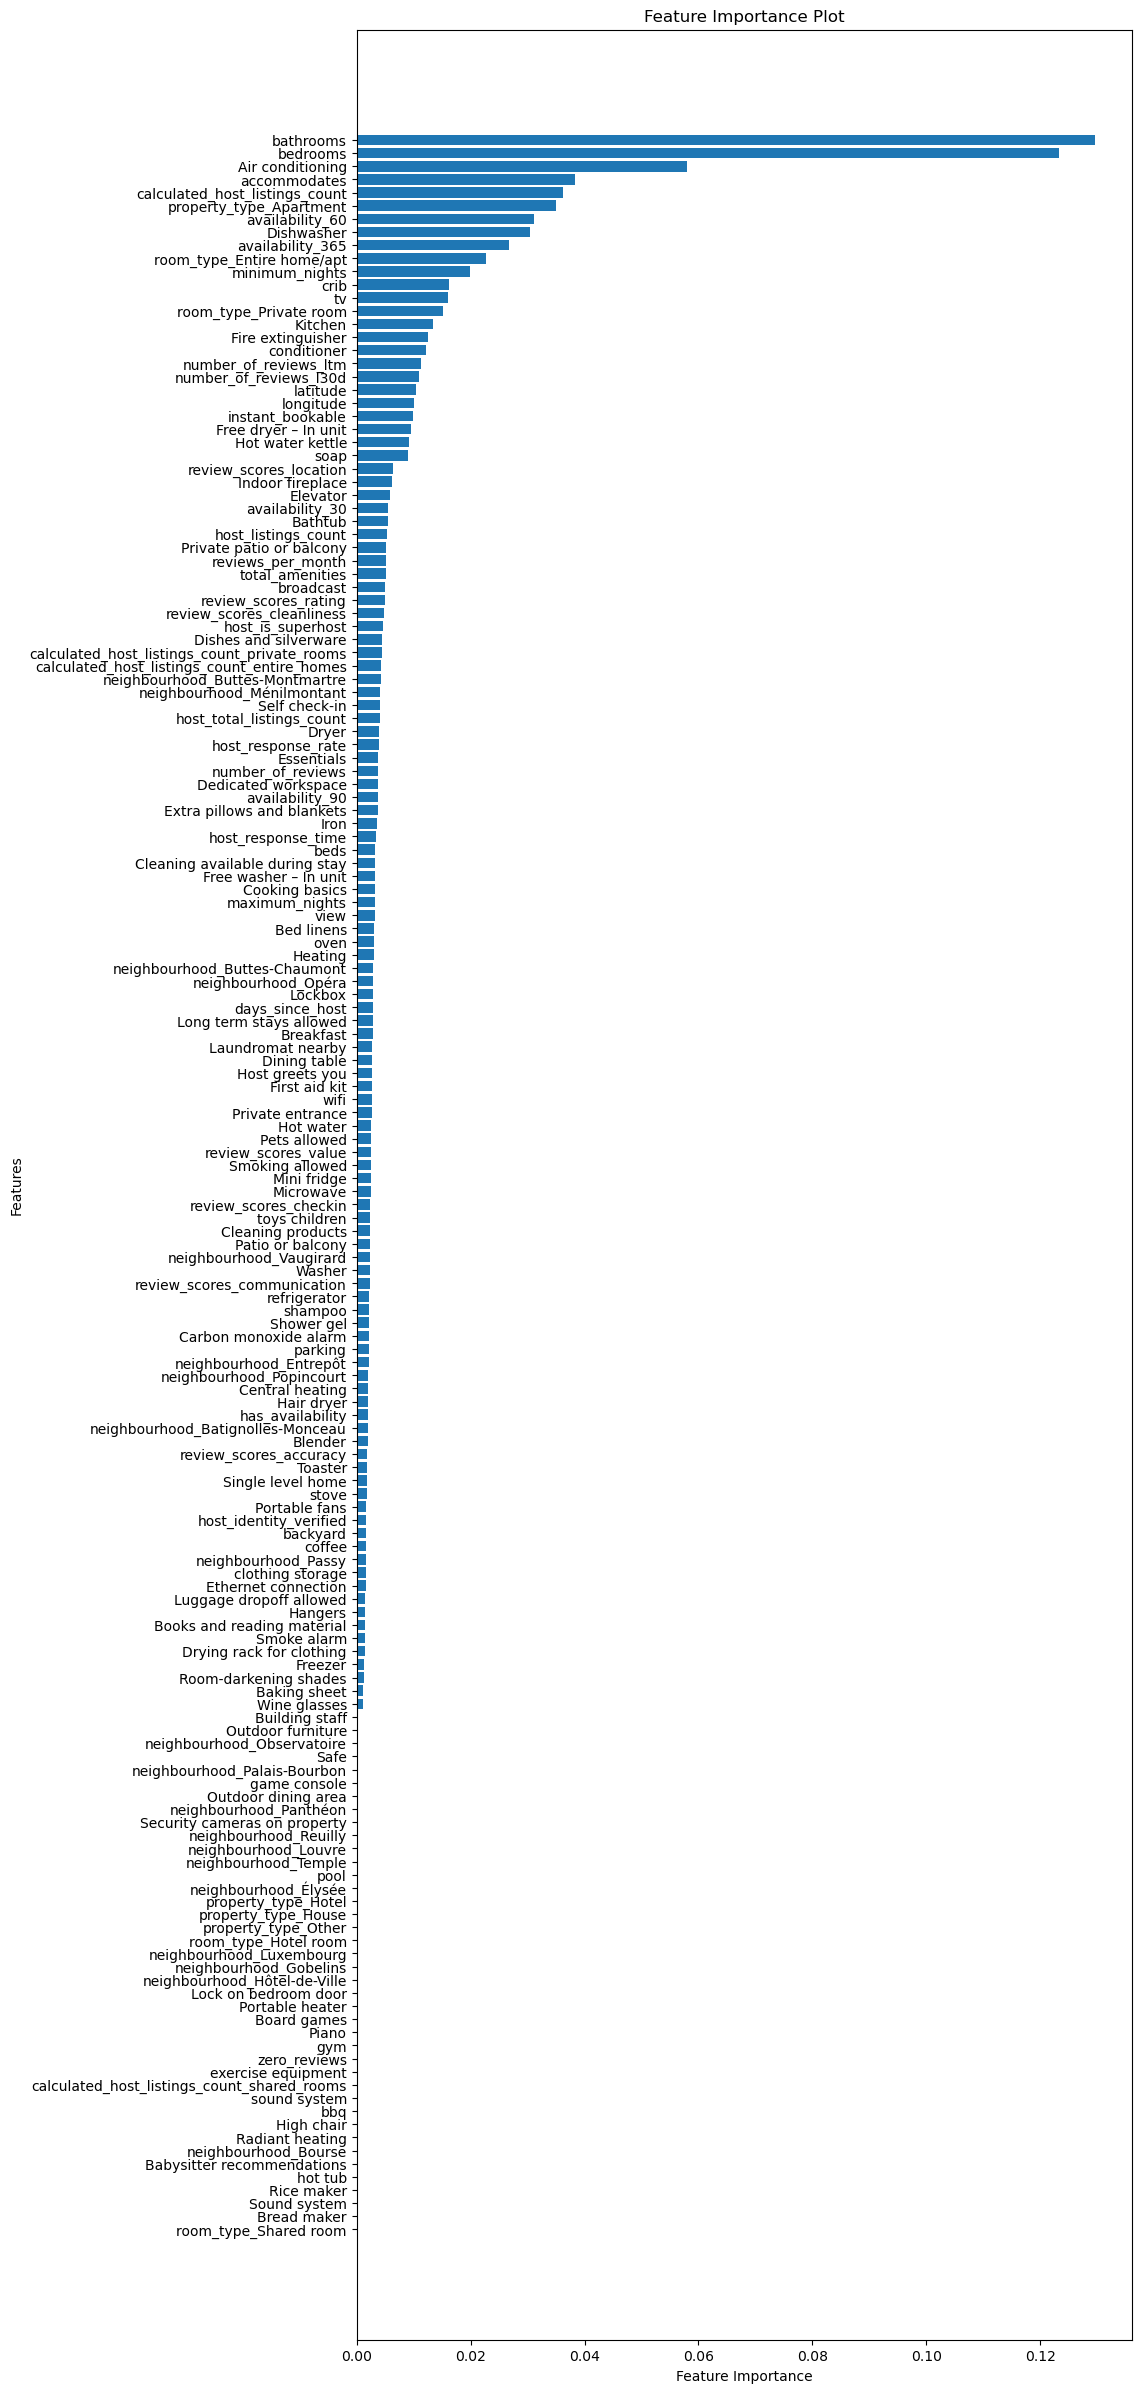


Dropped Features (Importance < 0.01):
Index(['host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_identity_verified', 'beds', 'maximum_nights', 'has_availability',
       'availability_30',
       ...
       'neighbourhood_Popincourt', 'neighbourhood_Reuilly',
       'neighbourhood_Temple', 'neighbourhood_Vaugirard',
       'neighbourhood_Élysée', 'property_type_Hotel', 'property_type_House',
       'property_type_Other', 'room_type_Hotel room', 'room_type_Shared room'],
      dtype='object', length=139)


In [27]:
# Filter out features with importance less than 0.01
selected_features_treshhold = X.columns[feature_importance >= 0.01]
X_train_treshhold = X_train[selected_features_treshhold]
X_test_treshhold = X_test[selected_features_treshhold]
dropped_features = X.columns[feature_importance < 0.01]

# Train a new XGBoost model with filtered features
model_filtered_treshhold = xgb.XGBRegressor()
model_filtered_treshhold.fit(X_train_treshhold, y_train)

# Predict on the test set with filtered features
y_pred_treshhold = model_filtered_treshhold.predict(X_test_treshhold)

# Calculate performance metrics with filtered features
mse_filtered_treshhold = mean_squared_error(y_test, y_pred_treshhold)
rmse_filtered_treshhold = mean_squared_error(y_test, y_pred_treshhold, squared=False)
r2_filtered_treshhold = r2_score(y_test, y_pred_treshhold)
mae_filtered_treshhold = mean_absolute_error(y_test, y_pred_treshhold)

# Print performance metrics with filtered features
print("\nPerformance metrics with filtered features:")
print("Mean Squared Error (MSE):", mse_filtered_treshhold)
print("Root Mean Squared Error (RMSE):", rmse_filtered_treshhold)
print("R-squared (R2):", r2_filtered_treshhold)
print("Mean Absolute Error (MAE):", mae_filtered_treshhold)

# Feature Importances
feature_importance = model.feature_importances_
sorted_idx = feature_importance.argsort()

# Plot feature importances
plt.figure(figsize=(10, 30))
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot")
plt.show()



# Print dropped features
print("\nDropped Features (Importance < 0.01):")
print(dropped_features)